# DBSCAN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Cluster 1: centered at (2, 2)
cluster_1 = np.random.normal(loc=[2, 2], scale=0.3, size=(50, 2))

# Cluster 2: centered at (6, 6)
cluster_2 = np.random.normal(loc=[6, 6], scale=0.3, size=(50, 2))

# Noise points
noise = np.random.uniform(low=0, high=8, size=(10, 2))

# Combine all points
X = np.vstack((cluster_1, cluster_2, noise))
df = pd.DataFrame(X, columns=['x', 'y'])
df

,x,y
0,2.149014,1.958521
1,2.194307,2.456909
2,1.929754,1.929759
3,2.473764,2.230230
4,1.859158,2.162768
...,...,...
105,4.090739,4.012130
106,6.386361,5.199711
107,5.615735,6.366341
108,7.120043,2.703961


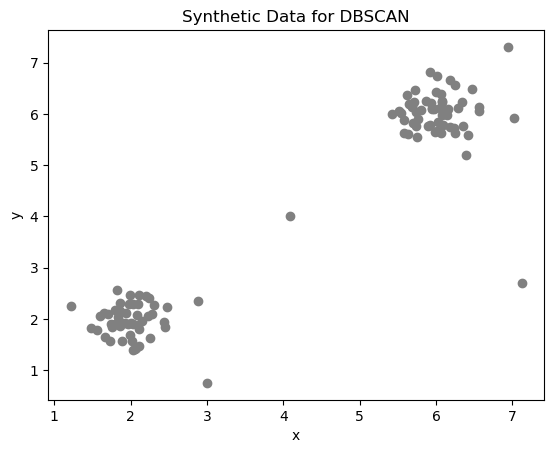

In [2]:
plt.scatter(df['x'], df['y'], c='gray')
plt.title("Synthetic Data for DBSCAN")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
from sklearn.cluster import DBSCAN

In [217]:
db=DBSCAN(eps=0.30, min_samples=3)

In [218]:
db.fit(df)

DBSCAN(eps=0.3, min_samples=3)

In [222]:
clusters=db.fit_predict(df)

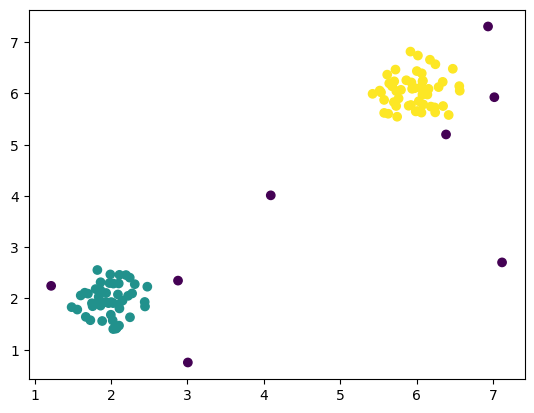

In [223]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=clusters)

In [224]:
from sklearn.metrics import silhouette_score

In [225]:
mask=clusters!=-1

In [226]:
silhouette_score(df[mask], clusters[mask])

np.float64(0.9119876113341735)

In [237]:
from sklearn.model_selection import GridSearchCV

In [238]:
GridSearchCV(estimator=db,
    param_grid={
        'eps' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
        'min_samples' : [1,2,3,4,5,6,7,8,9,10]
    })

GridSearchCV(estimator=DBSCAN(eps=np.float64(1.0), min_samples=3),
             param_grid={'eps': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                 1],
                         'min_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})